<a href="https://colab.research.google.com/github/mukesh875bhatta/Image-Processing-and-Pattern-Recognition/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Necessary libraries
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
from tensorflow.keras import layers, models

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
#reshape the data
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [ ]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.9070 - loss: 0.3170 - val_accuracy: 0.9812 - val_loss: 0.0598
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 30ms/step - accuracy: 0.9843 - loss: 0.0495 - val_accuracy: 0.9866 - val_loss: 0.0424
Epoch 3/5
1203/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9895 - loss: 0.0343

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9871 - loss: 0.0382
Test Accuracy: 0.9908000230789185


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


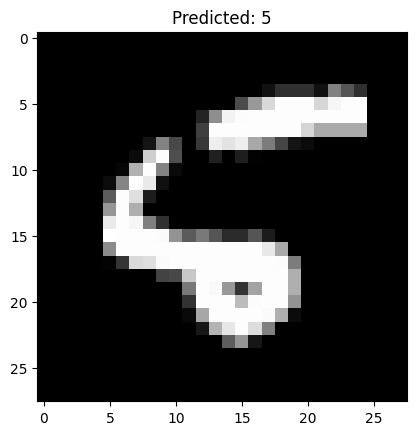

In [ ]:
import numpy as np

predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[8])

plt.imshow(x_test[8].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.show()


In [ ]:
model.save("mnist_cnn_model.h5")


In [ ]:
model.save('my_model.keras')